In this notebook, we investigate the possibility to use the (fast) fourier transform to detect the mode content inside the mode converter. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c, pi

# Spatial signal

The spatial signal is of the form:
$$
E(x) = \sum_{m=0}^M \sin\left(\frac{m\pi}{a}x \right)
$$

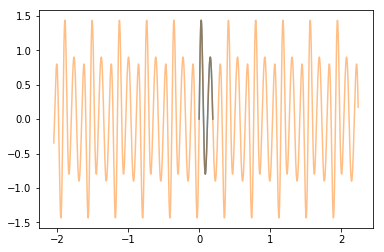

In [145]:
a = 0.192 # m
dx = 1e-4
x = np.arange(0, a+dx, step=dx, )
E = np.zeros_like(x)

# weights of the modes (example)
Ems = np.r_[0.2, 0, 1, 0.3, 0.1] 
# total electric field is the sum of the modes
for m, Em in enumerate(Ems, start=1):
    E += Em*np.sin(pi*m/a * x)

    # display the "measured field"
fig, ax = plt.subplots()
ax.plot(x, E)

# pad the spatial dimensions to improve the spectral resolution and display the results
x = np.pad(x, (20*1024,), 'reflect', reflect_type='odd')
E = np.pad(E, (20*1024,), 'reflect', reflect_type='odd') # reflect the signal as in infinite large wg

ax.plot(x, E, alpha=0.5)

# Fourier transform

In [129]:
from numpy.fft import fft, fftshift, fftfreq

Text(0.5,0,'$k_x$')

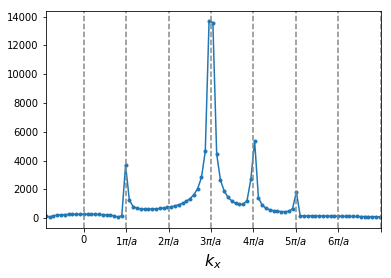

In [146]:
U = fftshift(fft(E))
kx= fftshift(fftfreq(len(x), d=dx)*2*pi)

fig, ax = plt.subplots()
ax.plot(kx, np.abs(U), marker='.')
ax.set_xlim(-.9*pi/a, 7*pi/a)

# shows where the modes 1,2,... are
for mode_index in range(8):
    ax.axvline(mode_index*pi/a, color='#888888', linestyle='--')
ax.set_xticks(np.arange(0,8)*pi/a)
ax.set_xticklabels([0] + [f'${m}\pi/a$' for m in range(1,7)])
ax.set_xlabel('$k_x$', size=16)

From the latter figure, we can clearly spot the various modes and their relative weights. 